# Purpose

There are 64 different codons that can be created by a triplet of mRNA for one particular reading frame. We want to find the expected distance of amino acids between the start and stop codons when given a uniform distribution of choosing a particular RNA.

`AUG` in the mRNA translates into the amino acid methionine: 

![methionine](images/methionine.png)

`UAA`, `UAG`, and `UGA` encode the stop codon, which tells ribosomes to stop translation.

## TODO:

- this model seems overly simplistic

---

Begin by randomly appending ribonucleotides to an array, each picked from a uniform distribution. Begin counting then length of the sequence when `A`, `U` and `G` are appended consecutively and stop counting when either one of the stop codons appear. 

Repeat this initially with 1,000 trials and see what you get.

In [55]:
import numpy as np

lookup_rna = { 0: 'A', 1: 'G', 2: 'U', 3: 'C' }

def random_rna():
    """
    Function for generating random RNA.
    """
    r = np.floor(np.random.uniform(0, 4))
    return lookup_rna[r]

Check uniform distribution.

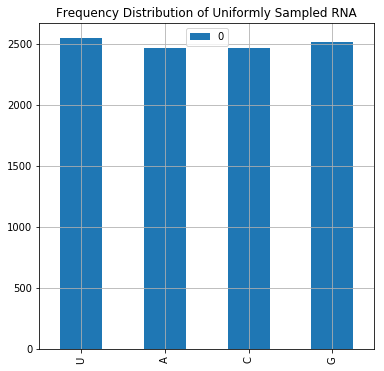

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

samples = []
N = 10000

for i in range(0, N):
    samples.append(random_rna())

rna_counts = Counter(samples)

df = pd.DataFrame.from_dict(rna_counts, orient='index')
df.plot(kind='bar', 
        title="Frequency Distribution of Uniformly Sampled RNA", 
        figsize=(6, 6),
        grid=True)

Ok. This is good. Now we'll begin building our mRNA.

In [89]:
cum_lengths = []
cum_buffers = []

for i in range(0, 10000):

    rna_buffer = []
    start_count = False
    rna_length = 0
    
    while True:
        to_add = random_rna()
        rna_buffer.append(to_add)
        
        if rna_buffer[-3:] == ['A', 'U', 'G'] and start_count is False:
            start_count = True
        
        if start_count is True:
            rna_length += 1
        
        if (rna_buffer[-3:] == ['U', 'A', 'A'] or rna_buffer[-3:] == ['U', 'A', 'G'] \
            or rna_buffer == ['U', 'G', 'A']) and start_count == True:
            cum_lengths.append(rna_length)
            cum_buffers.append(rna_buffer)
            break

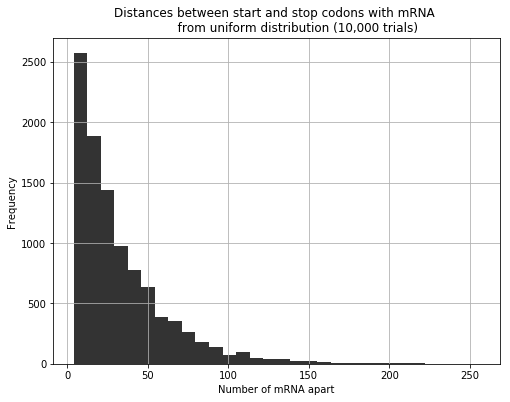

In [191]:
plt.figure(figsize=(8, 6))
plt.hist(cum_lengths, bins=30, color="k", alpha=0.8)
plt.grid(True)
plt.ylabel("Frequency")
plt.xlabel("Number of mRNA apart")
plt.title("Distances between start and stop codons with mRNA \n \
          from uniform distribution (10,000 trials)")

Fit an exponential curve.

In [192]:
from scipy.optimize import curve_fit

def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

length_counts = Counter(cum_lengths)

x = list(length_counts.keys())
y = list(length_counts.values())

In [193]:
popt, pcov = curve_fit(exp_func, x, y)

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in exp


In [194]:
popt

array([  3.80300017e+02,   3.34494540e-02,  -4.27268156e-01])

In [195]:
y_pred = []
for i in x:
    y_pred.append(exp_func(i, *popt))

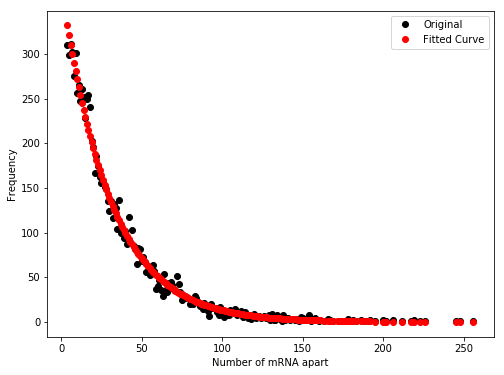

In [197]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'ko', label='Original')
plt.plot(x, y_pred, 'ro',  label="Fitted Curve")
plt.ylabel("Frequency")
plt.xlabel("Number of mRNA apart")
plt.legend()

When fit to the exponential curve, the expected length of the mRNA between the start and stop codons is $E[ length | \lambda] = \frac{1}{\lambda}$. So then since $\lambda = 0.0334494540$, $E[ length | \lambda]$ is

In [198]:
1/popt[1]

29.895854236181467

# Conclusion

The expected distance of amino acids between the start and stop codons is 30, if the mRNA are randomly sampled from a uniform distribution.

### Further work

- ...